In [13]:
import gzip 
import pickle
import os
import numpy as np

files={
    'train_img':'./data/train-images-idx3-ubyte.gz',
    'train_label':'./data/train-labels-idx1-ubyte.gz',
    'test_img':'./data/t10k-images-idx3-ubyte.gz',
    'test_label':'./data/t10k-labels-idx1-ubyte.gz'
    
}
def _load_img(filename):
    with gzip.open(filename,'rb')as f:
        data=np.frombuffer(f.read(),np.uint8, offset=16)
    data=data.reshape(-1,784)
    return data

def _load_label(filename):
    with gzip.open(filename,'rb')as f:
        data=np.frombuffer(f.read(),np.uint8,offset=8)
    return data

def _change_one_hot_label(X):
    T=np.zeros((X.size,10))
    for idx, row in enumerate(T):
        row[X[idx]]=1
    return T 

In [16]:

def load_mnist(normalize=True, flatten=True, one_hot_label=True):
    dataset={}
    for key in ('train_img','test_img'):
        dataset[key]=_load_img(files[key])
    for key in ('train_label','test_label'):
        dataset[key]=_load_label(files[key])
        
    if normalize:
        for key in ('train_img','test_img'):
            dataset[key]= dataset[key].astype(np.float32)
            dataset[key]/=255.0
            
    if one_hot_label:
        for key in ('train_label','test_label'):
            dataset[key]=_change_one_hot_label(dataset[key])
    if not flatten:
        dataset[key]=_change_one_hot_label(dataset[key])
    return ((dataset['train_img'],dataset['train_label']),
           (dataset['test_img'],dataset['test_label']))

5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 


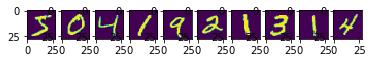

In [17]:

from matplotlib.pylab import plt

(x_train,y_train),(x_test,y_test)=load_mnist()

for i in range(10):
    img=x_train[i]
    label=np.argmax(y_train[i])
    print(label, end=", ")
    img=img.reshape(28,28)
    plt.subplot(1,10,i+1)
    plt.imshow(img)
print()
plt.show()
    
    